In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [3]:
datapath = Path.cwd()
file = "errors.jld2"

# Error Plot Mean

In [4]:
f = h5py.File(file, "r")
ED_sec = f["ED_sec"][()]
stdED_sec = f["stdED_sec"][()]

Kr_sec = f["Kr_sec"][()]
stdKr_sec = f["stdKr_sec"][()]

ED_tot = f["ED_tot"][()]
stdED_tot = f["stdED_tot"][()]
Kr_tot = f["Kr_tot"][()]
stdKr_tot = f["stdKr_tot"][()]

Ns = np.asarray([5,6,7,8,9,10,11,12,13,14,15])

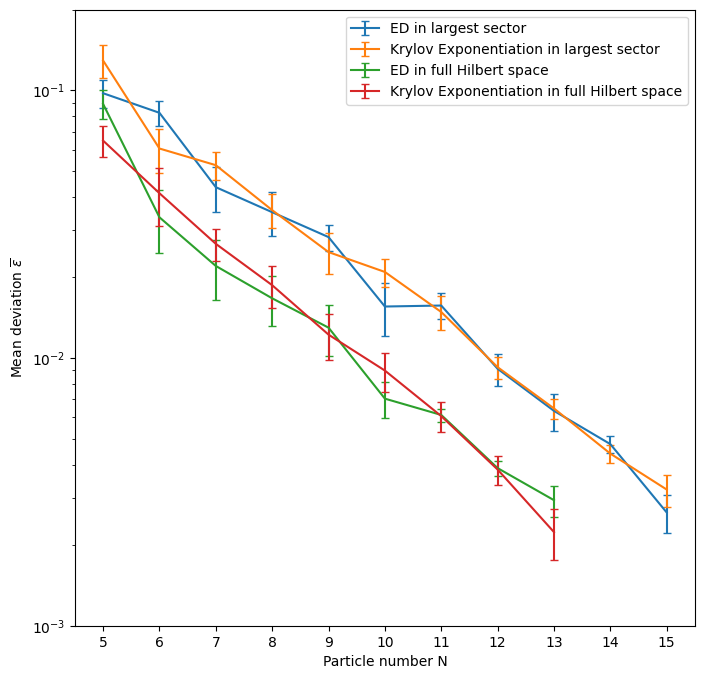

In [5]:
fig = plt.figure(figsize=(8,8))
plt.errorbar(Ns,ED_sec,yerr=stdED_sec, label = "ED in largest sector",capsize=3)
plt.errorbar(Ns,Kr_sec,yerr=stdKr_sec, label = "Krylov Exponentiation in largest sector",capsize=3)
plt.errorbar(Ns[0:9],ED_tot,yerr=stdED_tot, label = "ED in full Hilbert space",capsize=3)
plt.errorbar(Ns[0:9],Kr_tot,yerr=stdKr_tot, label = "Krylov Exponentiation in full Hilbert space",capsize=3)
plt.yscale("log")
plt.xlabel("Particle number N")
plt.ylabel(r'Mean deviation $\overline{\epsilon}$')
plt.ylim(1e-3,2e-1)
plt.xticks(Ns)
plt.legend()
plt.savefig("deviations.svg", format="svg")
plt.show()

# Box Plots